In [50]:
import numpy as np

In [51]:
training_data=np.load("training_data.npy",allow_pickle=True)

In [52]:
print(f'Training data: {training_data.shape}')

Training data: (24946, 2)


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

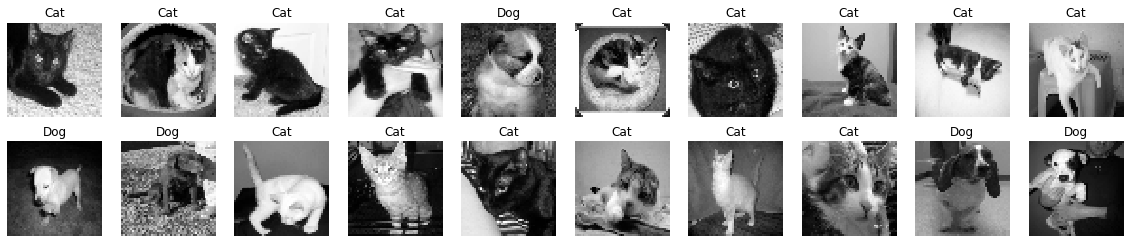

In [54]:
nx,ny,c=10,2,0
fig, axs = plt.subplots(ny,nx)
fig.set_size_inches(nx*2, 4)
for i in range(nx):
    for j in range(ny):
        axs[j,i].imshow(training_data[c][0], cmap="gray")
        axs[j,i].axis('off')
        if training_data[c][1][0] == 1.0:
            axs[j,i].set_title('Cat')
        else:
            axs[j,i].set_title('Dog')
        c+=1

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [56]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5)
        

        self.fc1 = nn.Linear(in_features=24 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=2)
        
       
    
    def forward(self, t):
        
        # (1) Input layer
        t=t
        
        
        print(f'Convolutional Layers\n')
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print(f'Conv1: {t.shape}')
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print(f'Conv2: {t.shape}')
        
        # (4) hidden conv layer
        t = self.conv3(t)
        t = F.relu(t)
        print(f'Conv3: {t.shape}')
        
        
        # Flattening
        t=torch.flatten(t, start_dim=1)
        print(f'\n\nFlattening  the Tensor\n\nSize: {t.shape}')
        
        
        print(f'\n\nFully conected Layers\n')
        # (5) hidden linear layer
        t = self.fc1(t)
        t = F.relu(t)
        print(f'Fc1: {t.shape}')
        
        # (6) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        print(f'Fc2: {t.shape}')
        
        # (6) output layer
        t = self.out(t)
        t = F.softmax(t, dim=1)
        print(f'Out: {t.shape}')
        print(f'\nValues: {t}')
        
        return t

In [57]:
network=Net()
print(network,'\n\n')
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=2, bias=True)
) 


conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
conv3.weight 		 torch.Size([24, 12, 5, 5])
conv3.bias 		 torch.Size([24])
fc1.weight 		 torch.Size([120, 600])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([2, 60])
out.bias 		 torch.Size([2])


In [58]:
x = torch.randn(50,50).view(-1,1,50,50) #(batch_size,in_channels,height,width)
out=network.forward(x)

Convolutional Layers

Conv1: torch.Size([1, 6, 23, 23])
Conv2: torch.Size([1, 12, 9, 9])
Conv3: torch.Size([1, 24, 5, 5])


Flattening  the Tensor

Size: torch.Size([1, 600])


Fully conected Layers

Fc1: torch.Size([1, 120])
Fc2: torch.Size([1, 60])
Out: torch.Size([1, 2])

Values: tensor([[0.5197, 0.4803]], grad_fn=<SoftmaxBackward>)


In [61]:
#Splitting the data in inputs and outputs
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255 #Normalize the data, all the data gonna be between 0 and 1
y = torch.Tensor([i[1] for i in training_data])

test_percentage = 0.1 #Test again 10 percent of the dataset
test_size = int(len(X)*test_percentage)
print(f'Test Data: {test_size}')

Test Data: 2494


In [68]:
#Train data
train_x=X[:-test_size]
train_y=y[:-test_size]

#Test data
test_x=X[-test_size:]
test_y=y[-test_size:]

print(f'Train:\t{train_x.shape}\nTest:\t{test_x.shape}')

Train:	torch.Size([22452, 50, 50])
Test:	torch.Size([2494, 50, 50])


In [71]:
out=network.forward(train_x[0].view(-1,1,50,50))

Convolutional Layers

Conv1: torch.Size([1, 6, 23, 23])
Conv2: torch.Size([1, 12, 9, 9])
Conv3: torch.Size([1, 24, 5, 5])


Flattening  the Tensor

Size: torch.Size([1, 600])


Fully conected Layers

Fc1: torch.Size([1, 120])
Fc2: torch.Size([1, 60])
Out: torch.Size([1, 2])

Values: tensor([[0.5154, 0.4846]], grad_fn=<SoftmaxBackward>)
